In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

import seaborn as sns
import matplotlib.pyplot as plt

print(__version__)

5.9.0


In [2]:
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [3]:
df = pd.read_csv('../data/history/Gargalo10_hvs.csv', index_col=[0,1], names=['HV','Profile']+list(range(2000)), header=None)
df = df.T
df.head()

c:\Users\diogo\anaconda3\envs\Gargalo\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning:

Columns (32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,2

HV             16                                                   \
Profile action_name              reward target               power   
0              rest  1.0088741717397582    NaN                 NaN   
1           try_sex   5.999895538798471     14  2.7486054895179093   
2               NaN                 NaN    NaN                 NaN   
3               NaN                 NaN    NaN                 NaN   
4               NaN                 NaN    NaN                 NaN   

HV                                17                                \
Profile         resistance action_name               reward target   
0                      NaN      attack  0.13071484235312797     10   
1        3.041145047334739        rest   1.0333214182362411    NaN   
2                      NaN         NaN                  NaN    NaN   
3                      NaN         NaN                  NaN    NaN   
4                      NaN         NaN                  NaN    NaN   

HV                                              ...        4574  \
Profile               power         resistance  ... action_name   
0        1.9983325444432638  1.098579236771829  ...      attack   
1                       NaN                NaN  ...        rest   
2                       NaN                NaN  ...         eat   
3                       NaN                NaN  ...      attack   
4                       NaN                NaN  ...     try_sex   

HV                                                                        \
Profile              reward target             power          resistance   
0         4.085258850656708   4572  1.93900801569861  2.8239124615453997   
1        3.2779875429090124    NaN               NaN                 NaN   
2        2.9196194617033155    NaN               NaN                 NaN   
3         4.085258850656708   4574  1.93900801569861  2.9384045103000136   
4         6.143748366918544   4574  1.93900801569861  2.9384045103000136   

HV             13                                                
Profile action_name              reward target power resistance  
0               eat  1.1465307937884333    NaN   NaN        NaN  
1               eat  1.1465307937884333    NaN   NaN        NaN  
2               eat  1.1465307937884333    NaN   NaN        NaN  
3               eat  1.1465307937884333    NaN   NaN        NaN  
4               eat  1.1465307937884333    NaN   NaN        NaN  

[5 rows x 22915 columns]

In [4]:
columns = ['energy_pool','food_consumption','power_attack','resistance_attack',
            'reward_eat','reward_rest','reward_sex','reward_violence','feature1', 'birth', 'age']
df_info = pd.read_csv('../data/history/Gargalo10_info_hvs.csv', index_col=0, names=columns, header=None)
df_info.head()

,energy_pool,food_consumption,power_attack,resistance_attack,reward_eat,reward_rest,reward_sex,reward_violence,feature1,birth,age
16,2.977073,1.099687,2.748605,1.979001,1.093247,1.008874,2.999948,2.679147,2.016272,1,2
17,0.957187,1.176534,1.998333,0.269902,1.000934,1.033321,0.999860,0.016339,0.008026,2,2
15,2.978073,2.005121,1.602698,1.839369,1.297080,1.009307,1.000002,2.062963,1.008373,1,6
18,1.490374,3.044918,1.362858,2.963543,1.149921,2.000002,1.117812,1.617549,3.250304,3,6
20,2.977057,1.034279,2.385628,1.000001,0.936722,1.008874,1.999962,2.679145,1.016600,5,4


In [8]:
ihvs = list(df.xs('reward', level='Profile', axis=1).columns)
ihvs.sort()

In [6]:
def get_dfs(df, ihv):
    dfs = df[ihv]
    dfs = dfs[(dfs['reward'].notna())]
    cols = dfs.columns.drop('action_name')
    dfs[cols] = dfs[cols].apply(pd.to_numeric)    
    #dfs['target'] = pd.to_numeric(dfs['target'], downcast='unsigned')
    dfs['target'] = dfs['target'].astype('Int64')
    dfs['pow_o_res'] = (dfs['power']-dfs['resistance'])/((dfs['power']+dfs['resistance']))
    # dfs.info()
    return dfs

In [7]:
def pool_period(dfs, period):
    # print(dfs['reward'].head)
    # print(dfs['reward'].loc[0:period].sum())
    # col_name = f'rew_pool{period}'
    ser = dfs['reward'].copy()
    for i in range(period, dfs.shape[0]):
        ser.loc[i] = dfs['reward'].loc[i-period:i].sum()/period
    return ser

def avg_period(dfs, period):
    dic = {}
    for i in range(0, dfs.shape[0], period):
        dic[i] = dfs['reward'].loc[i:i+period-1].sum()/period
    ser = pd.Series(dic)
    return ser

In [18]:
dfs = {}
for i in ihvs[0:15]:
    #print('HV ', i)
    dfs[i] = get_dfs(df, i)
    # dfs[i] = pool_period(dfs[i], 10)
    # dfs[i] = pool_period(dfs[i], 20)
    # dfs[i] = pool_period(dfs[i], 100)

In [10]:
def plot_profile(ihv):
    fig, ax = plt.subplots(figsize=(12,3))
    #dftmp = dfs[0]['reward']
    dftmp = df_info.loc[ihv]
    cols = dftmp.index.drop(['birth', 'age'])
    #sns.barplot(data=dftmp)
    dftmp[cols].plot.bar()
    birth = int(dftmp['birth'])
    age = int(dftmp['age'])
    ax.set_title(f'Profile of HV{ihv}. Born on {birth}, died at age {age}')

In [11]:
def plot_actions(ihv):
    sns.set_style("whitegrid")
    fig, (ax1, ax2)  = plt.subplots(figsize=(20,5), nrows=1, ncols=2)
    df_cnt = dfs[ihv].groupby(by=["action_name"]).count()[["reward"]].rename(columns={"reward":"count"}).reset_index()    
    labels = df_cnt['action_name']
    counts = df_cnt['count']
    ax1.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    
    df_reward = dfs[ihv].groupby(by=["action_name"]).sum()[["reward"]].rename(columns={"reward":"sum"}).reset_index()
    labels = df_reward['action_name']
    sum_rew = df_reward['sum']    
    ax2.pie(sum_rew, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

    # df_cnt.plot(kind="pie",
    #                             labels="action_name",
    #                             values="Count",
    #                             textinfo='percent+label', hole=.4,
    #                             ax=ax1)
    # df_reward.plot(kind="pie",
    #                             labels="action_name",
    #                             values="Sum",
    #                             textinfo='percent+label', hole=.4,
    #                             ax=ax2)


In [40]:
def plot_reward(ihv, period, avg):
    fig, ax = plt.subplots(figsize=(12,3))
    dftmp = dfs[ihv]    
    if period>dftmp.shape[0]:
        period=dftmp.shape[0]
    dftmp = dftmp.loc[0:period]
    dftmp = avg_period(dftmp, avg)
    sns.regplot(x=dftmp.index, y=dftmp)

    # put dates other HV died
    shift = max(0., df_info.loc[ihv]['age'] - 2000.)
    ihvs = list(df_info.index)
    ihvs.sort()
    from15 = 15
    for i in ihvs[0:15]:
        dead = df_info.loc[i]['age']-shift
        if dead<0:
            from15 -= 1
        elif dead<min(period,2000.):
            ax.axvline(x=dead, color='r')
            ax.text(dead, 5, f'HV{i}', fontsize=14)

            #ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
                #verticalalignment='top', bbox=props)


    ax.set_xlabel('Age')
    ax.set_ylabel('Reward (avg. 20 days)')
    ax.set_title(f'Reward tendency of HV{ihv}. {from15} from 15 were alive at 0.')

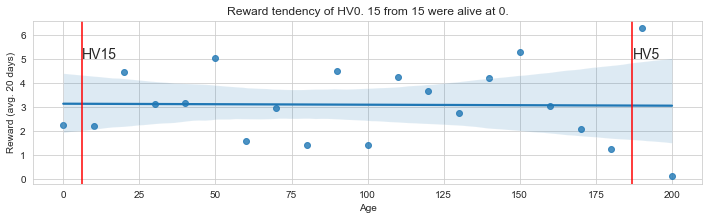

In [41]:
plot_reward(0, 200, 10)

In [13]:
def plot_targeted(ihv, max_hv):
    fig, ax1 = plt.subplots(figsize=(12,3))
    ax2 = ax1.twinx()

    dtmp = dfs[ihv]
    dtmp = dtmp[(dtmp['action_name']=='attack')|(dtmp['action_name']=='try_sex')]
    dtmp = dtmp[dtmp['target']<max_hv]

    sns.histplot(data=dtmp, discrete=True, x='target', hue='action_name', multiple='stack', ax=ax1, alpha=.5)

    ltg = list(dtmp['target'].unique())
    ltg.sort()   
    ser = pd.Series({tgt : dtmp[dtmp['target']==tgt].iloc[0]['pow_o_res'] for tgt in ltg})
    colors = ['b' if c>0 else 'r' for c in ser]
    ser.plot(kind='bar', ax=ax2, alpha=.5, color=colors)

    ax2.axhline(y=0, color='k')
    ax2.set_ylabel('Power/Resistance')



    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.title(f'Targeted Actions of HV{ihv}')

In [15]:
def plot_targeted_scatter(ihv):
    _ = dfs[ihv]
    _[(_['action_name']=='attack')|(_['action_name']=='try_sex')].figure(kind="scatter",
                x="pow_o_res", y='reward',
                mode='markers',categories="action_name",
                theme="white",
                xTitle="Power/Resistance", yTitle="Reward",
                title="", opacity=0.2)

In [19]:
{i: dfs[i].shape[0] for i in ihvs[0:15]}

{0: 1578,
 1: 2000,
 2: 2000,
 3: 2000,
 4: 2000,
 5: 187,
 6: 2000,
 7: 2000,
 8: 1777,
 9: 2000,
 10: 2000,
 12: 2000,
 13: 2000,
 14: 2000,
 15: 6}

In [20]:
def plots(ihv):
    plot_profile(ihv)
    plot_actions(ihv)
    plot_reward(ihv, 200, 10)
    plot_reward(ihv, 20000, 40)
    plot_targeted(ihv, 20)
    plot_targeted(ihv, 50)
    plot_targeted_scatter(ihv)
    

c:\Users\diogo\anaconda3\envs\Gargalo\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

c:\Users\diogo\anaconda3\envs\Gargalo\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

c:\Users\diogo\anaconda3\envs\Gargalo\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

c:\Users\diogo\anaconda3\envs\Gargalo\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

c:\Users\diogo\anaconda3\envs\Gargalo\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np 

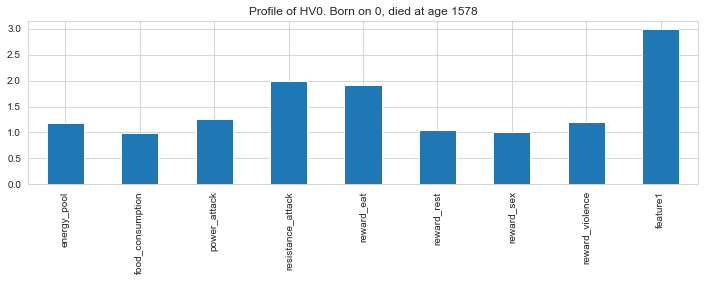

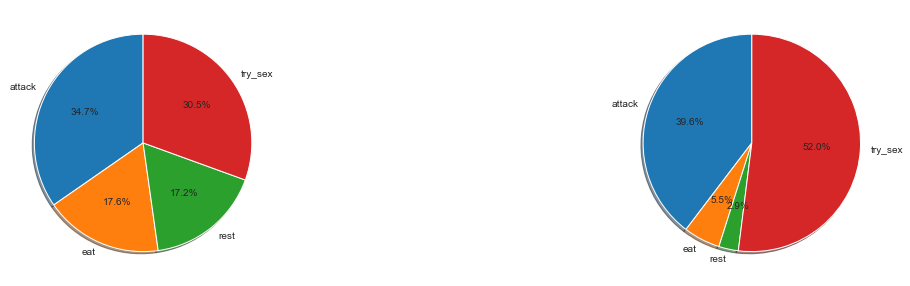

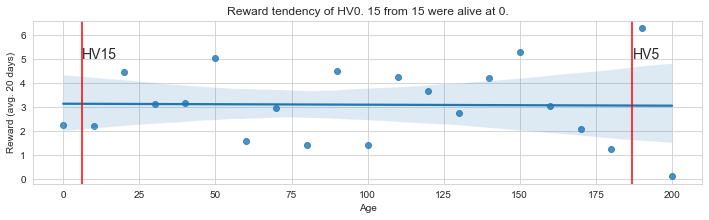

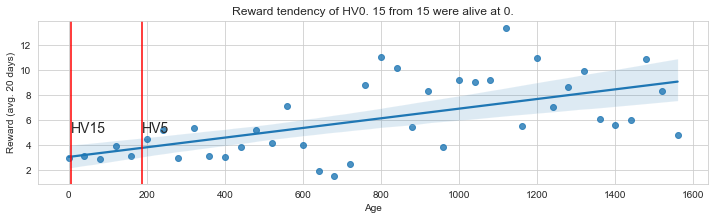

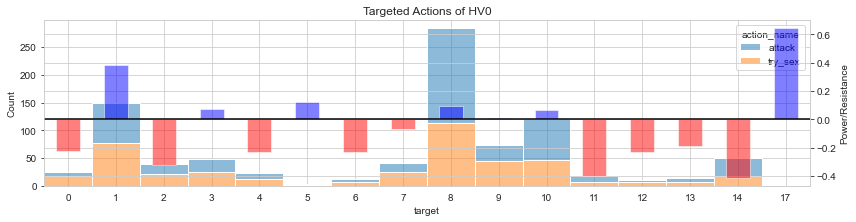

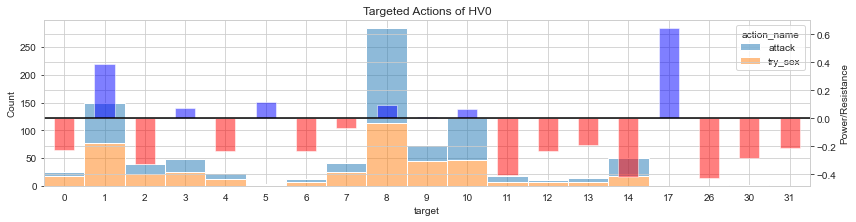

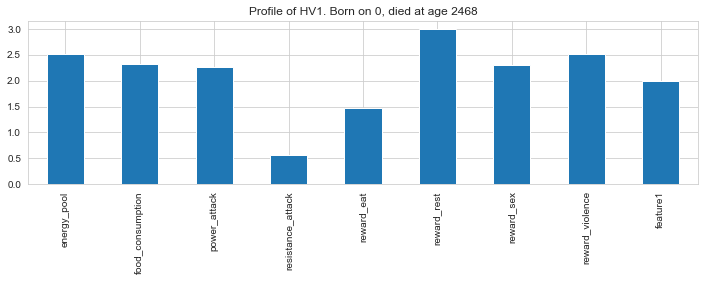

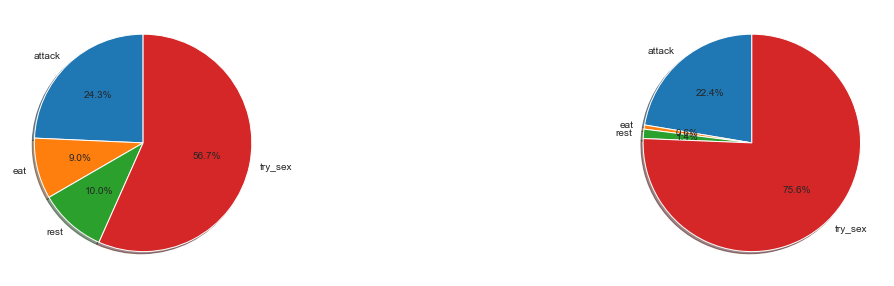

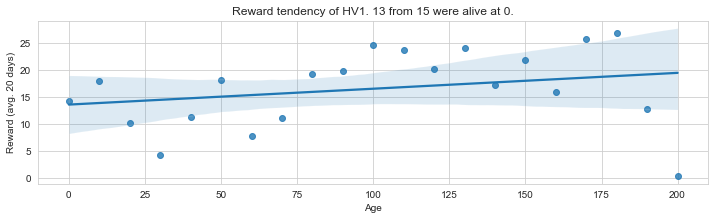

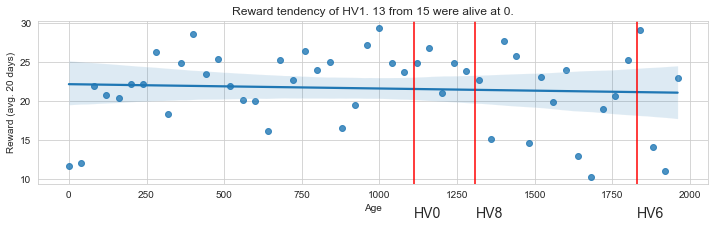

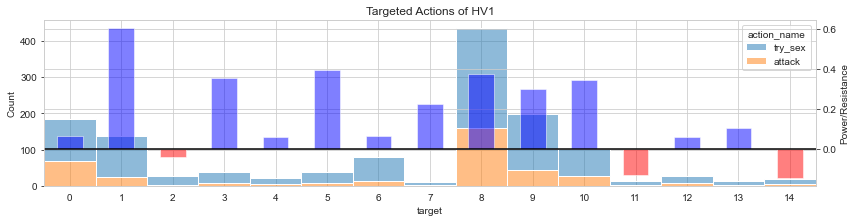

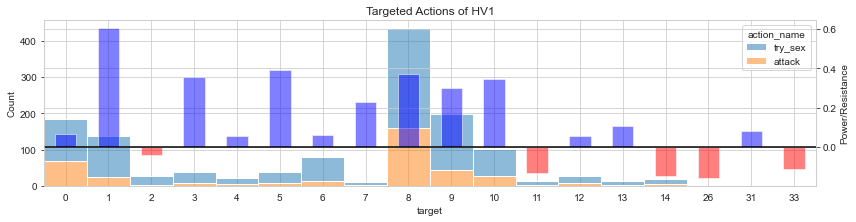

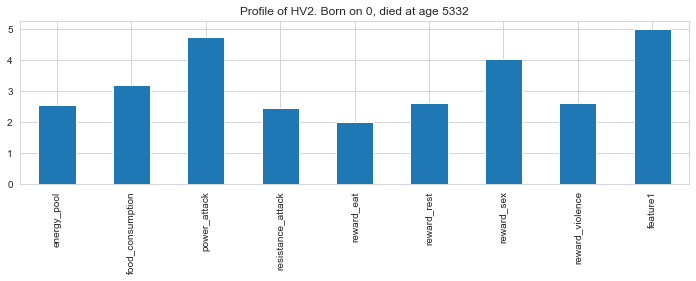

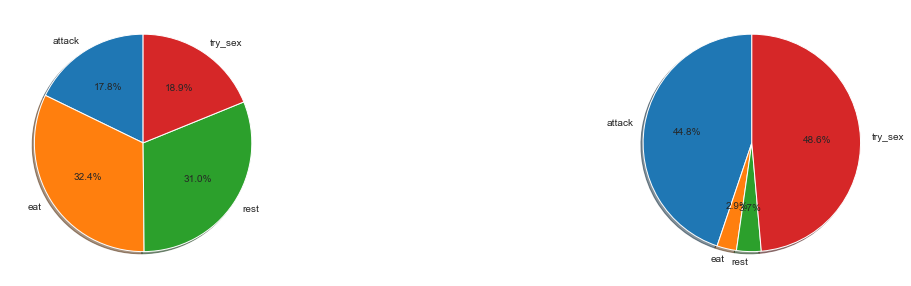

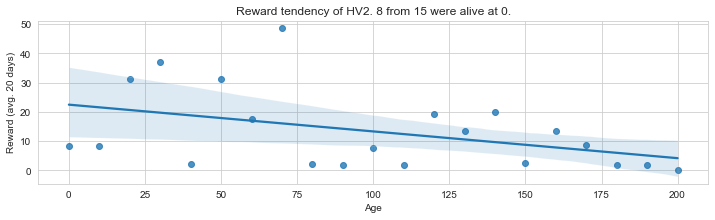

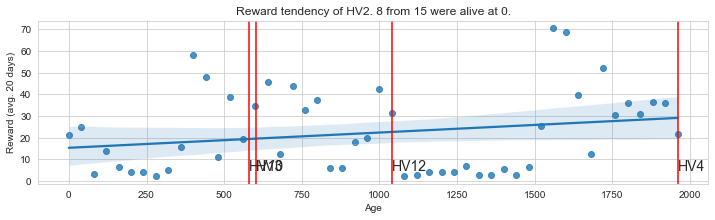

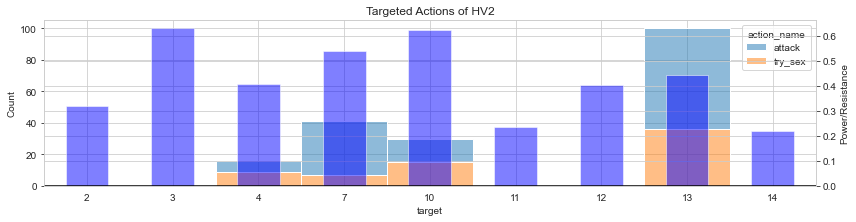

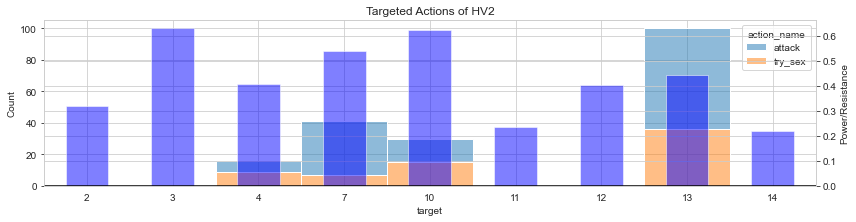

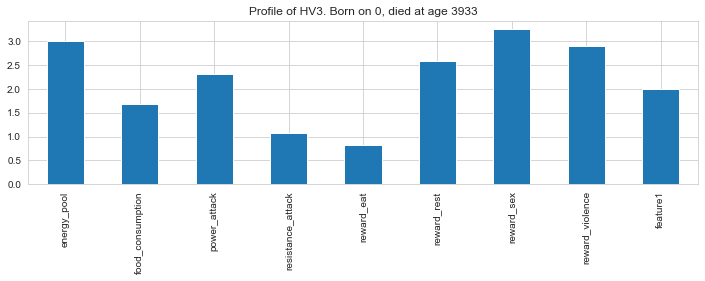

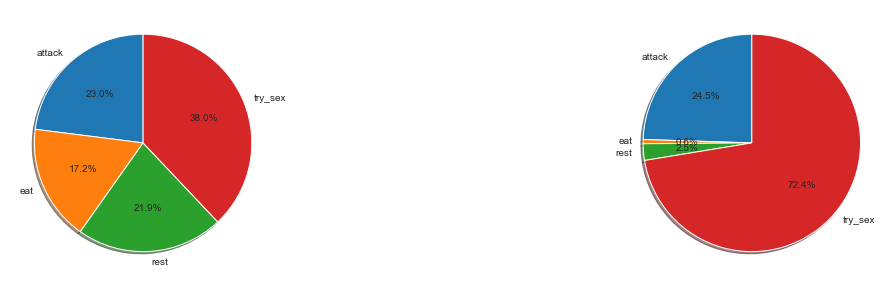

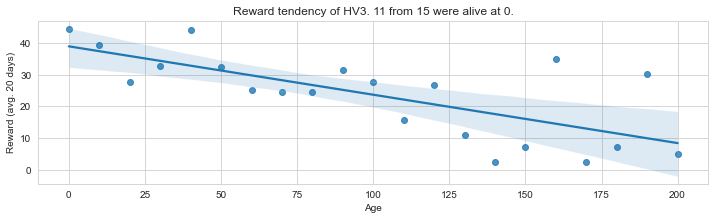

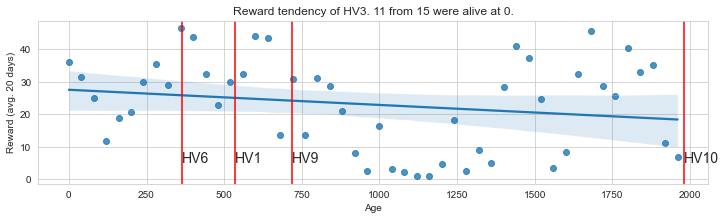

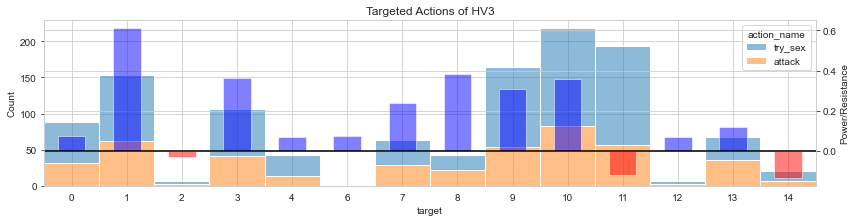

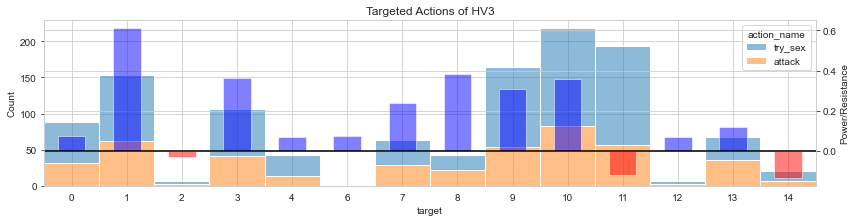

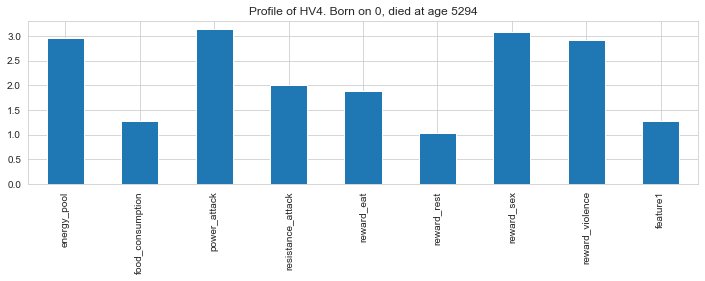

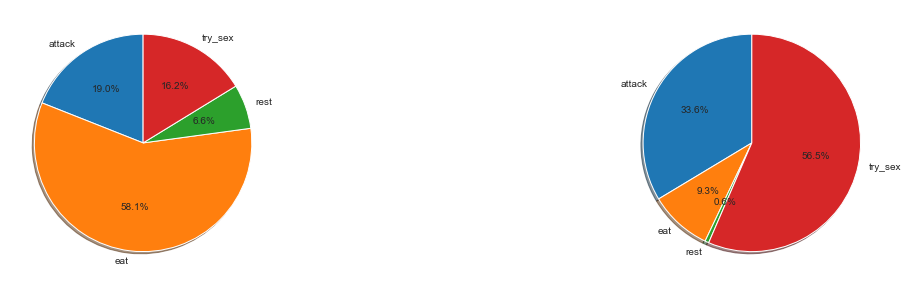

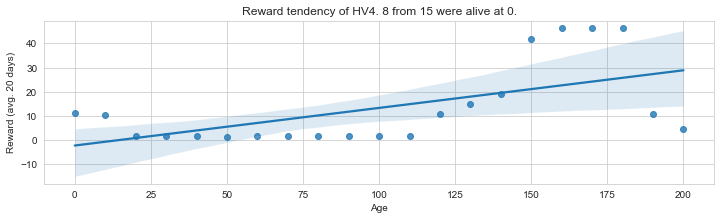

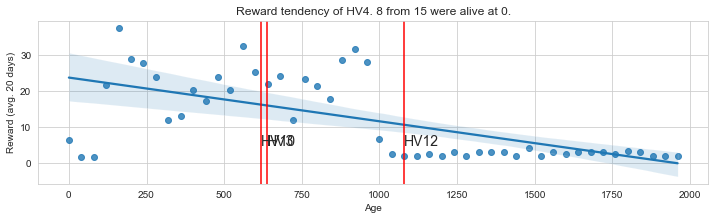

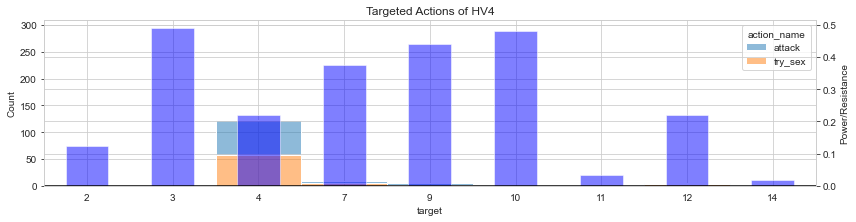

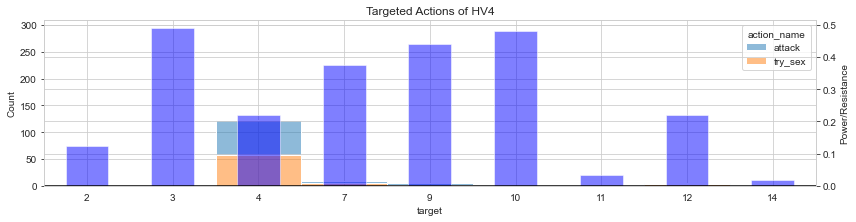

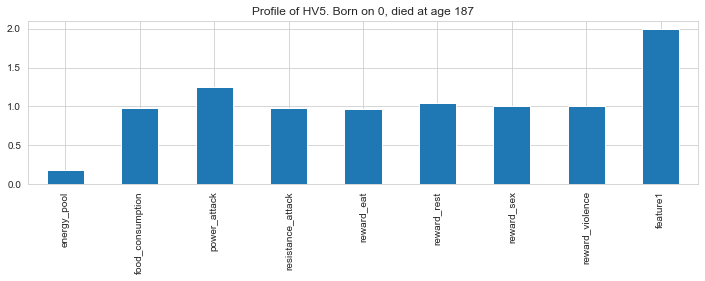

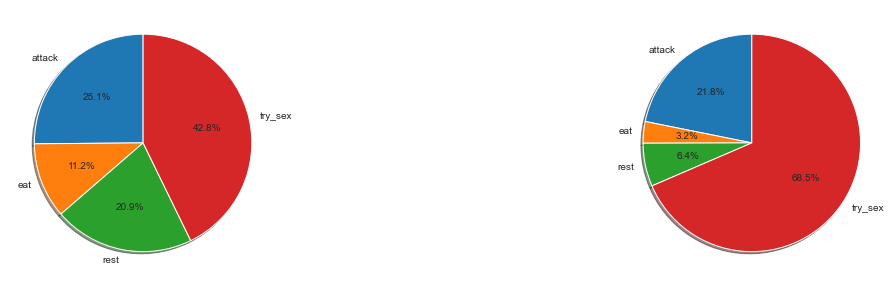

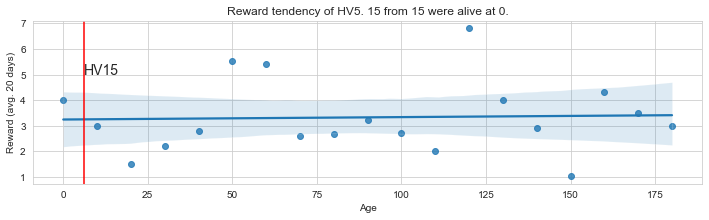

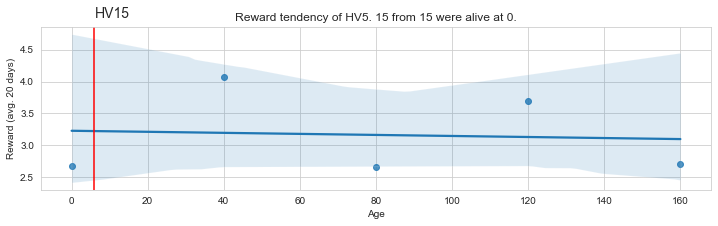

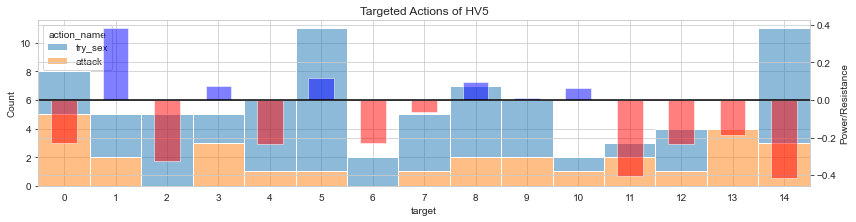

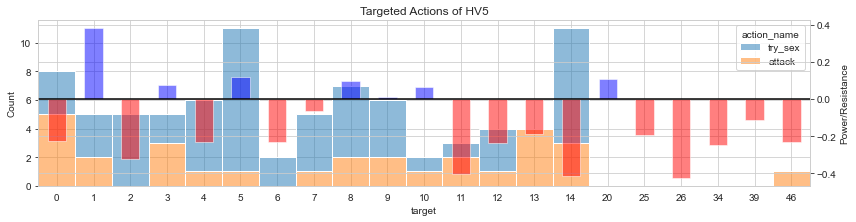

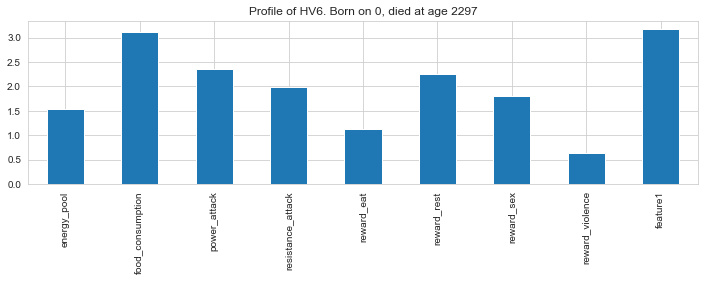

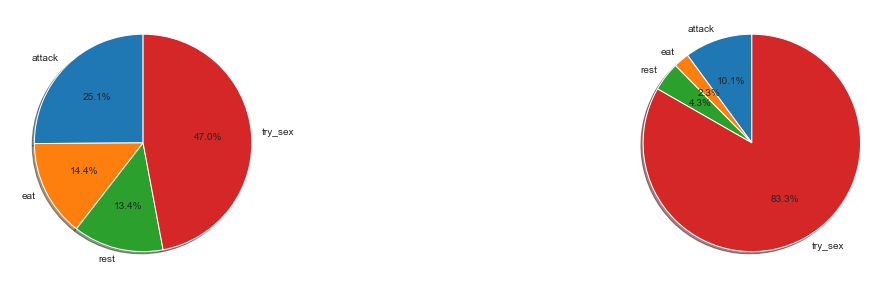

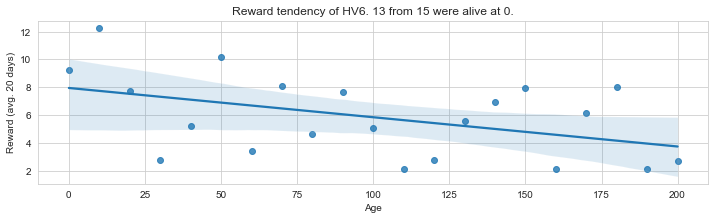

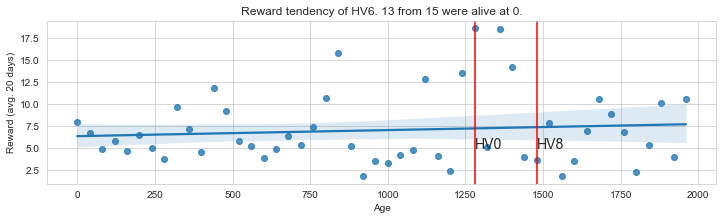

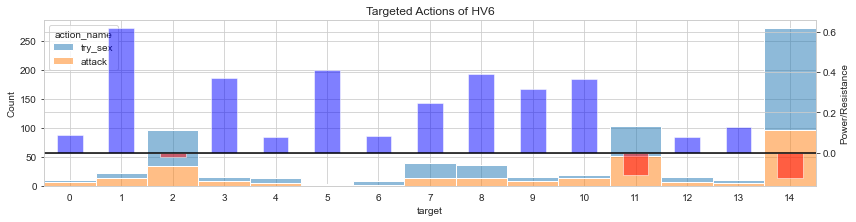

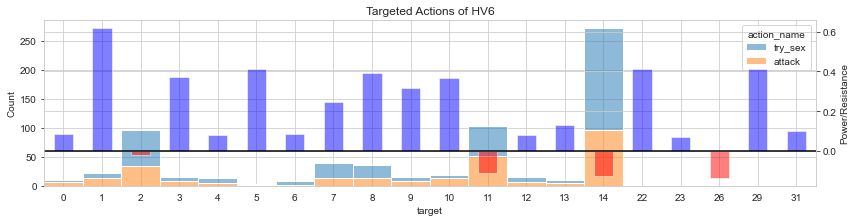

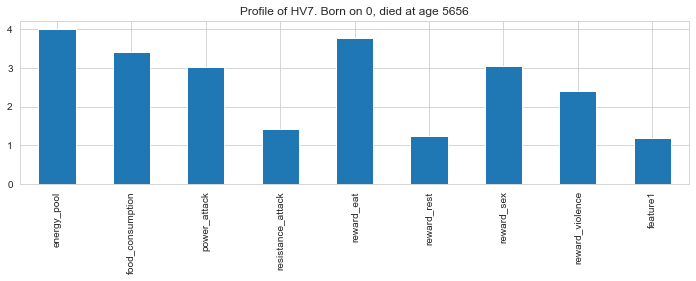

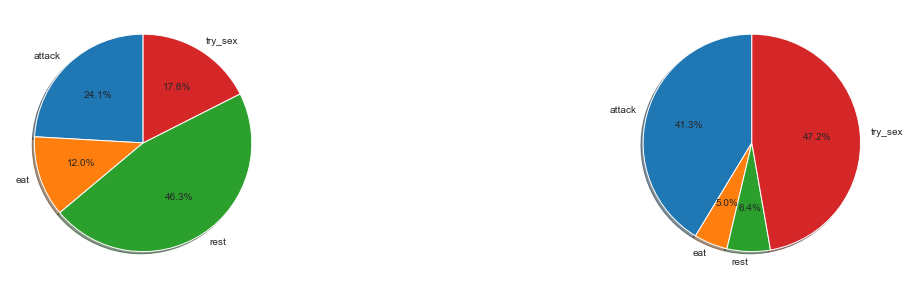

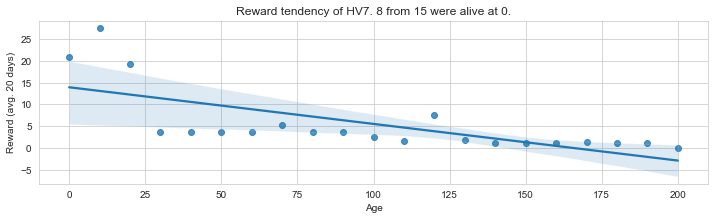

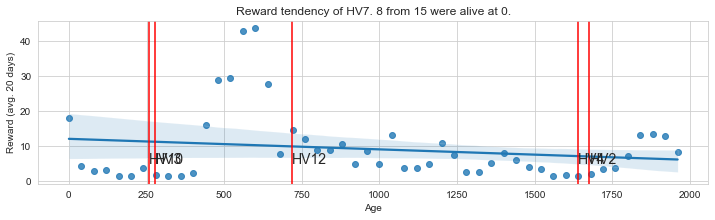

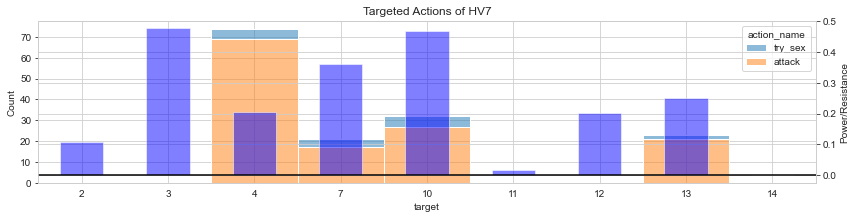

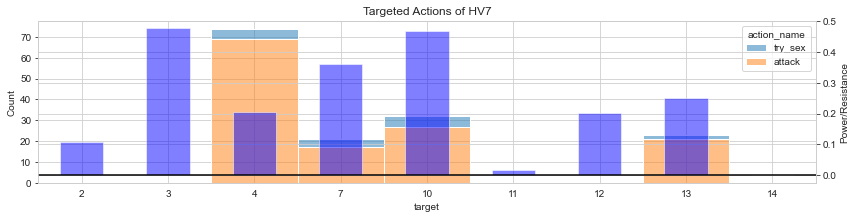

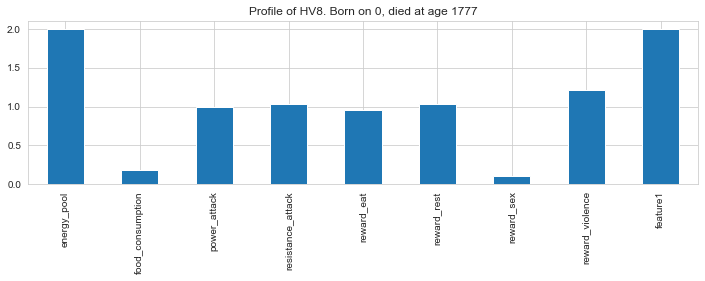

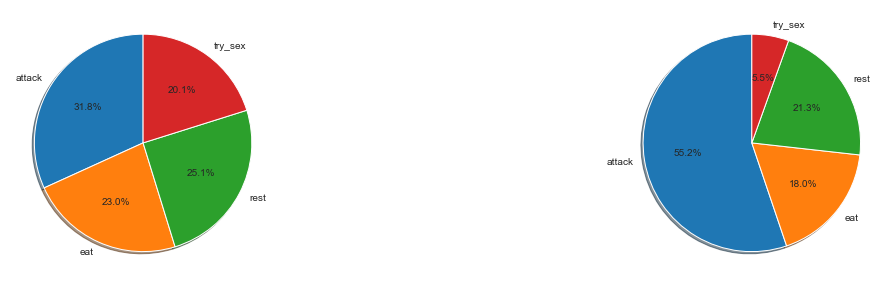

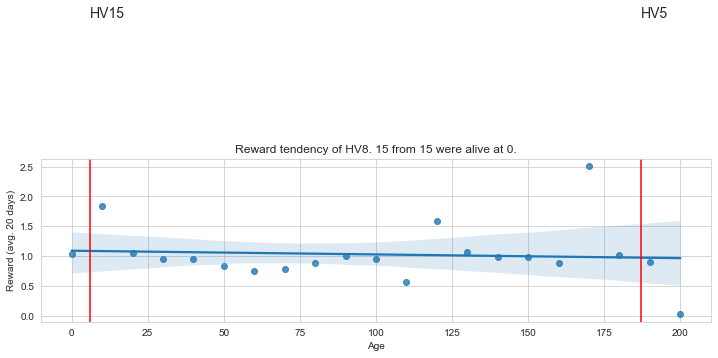

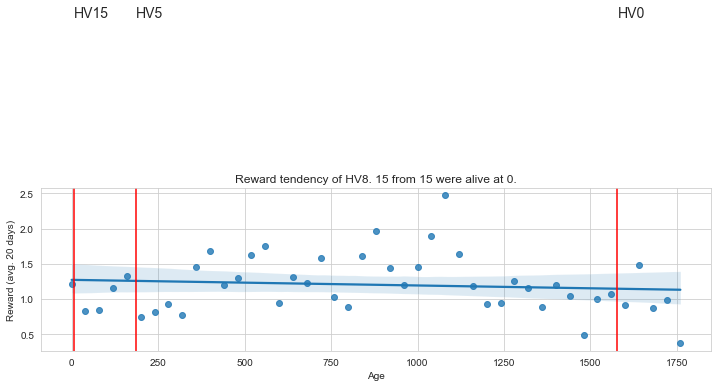

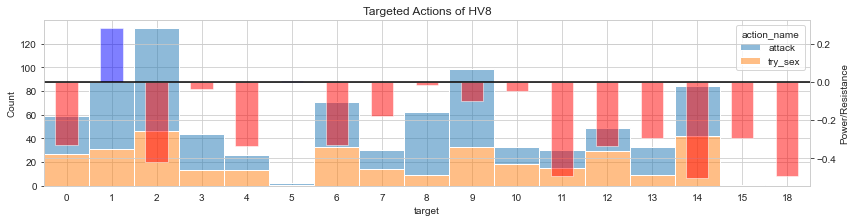

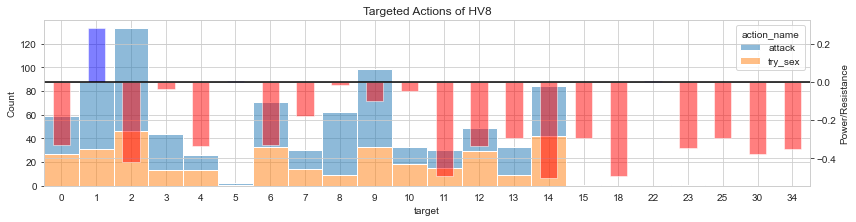

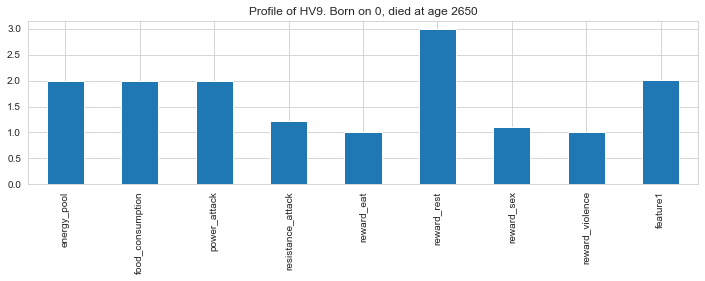

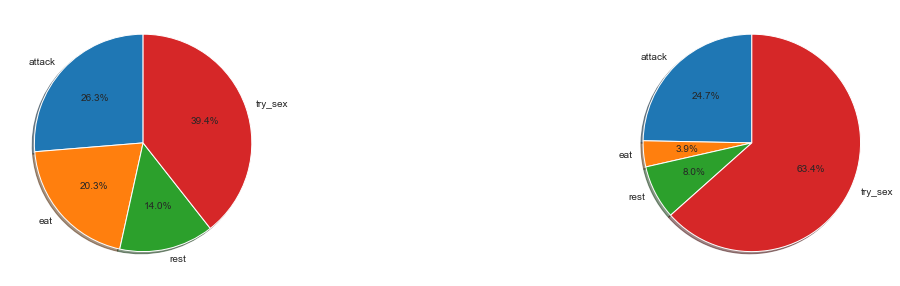

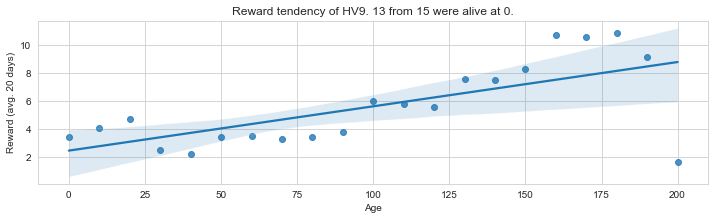

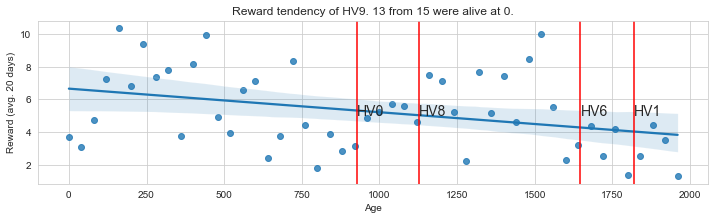

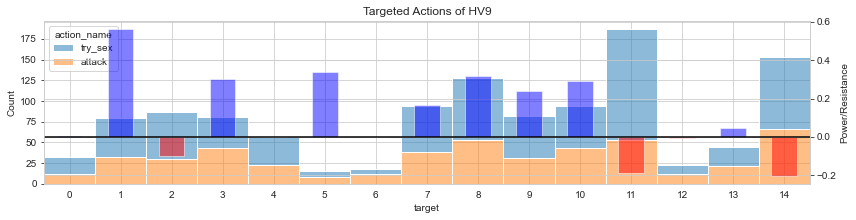

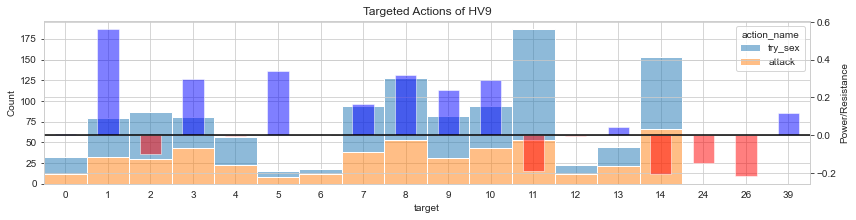

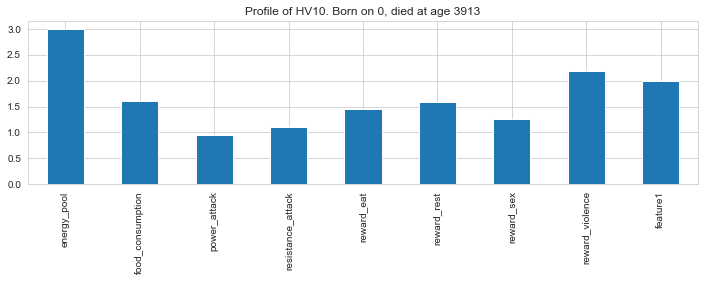

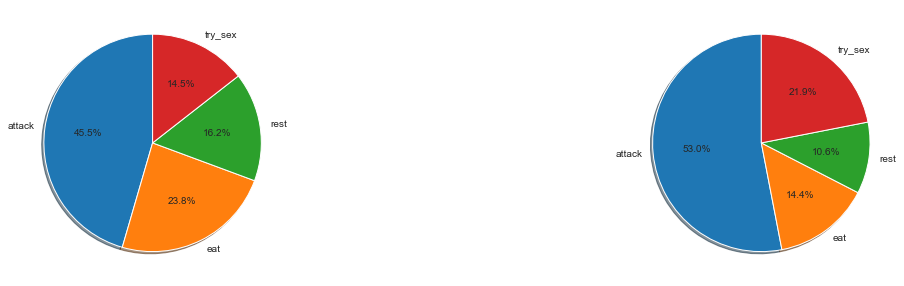

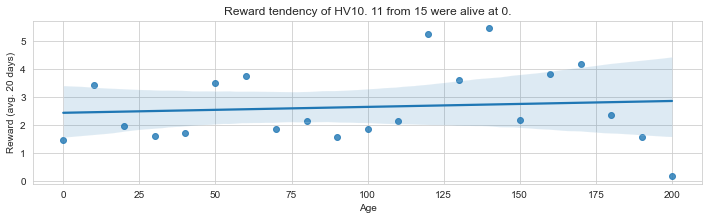

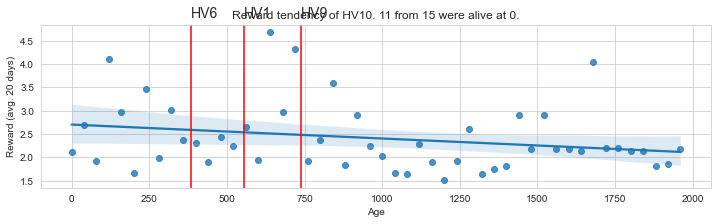

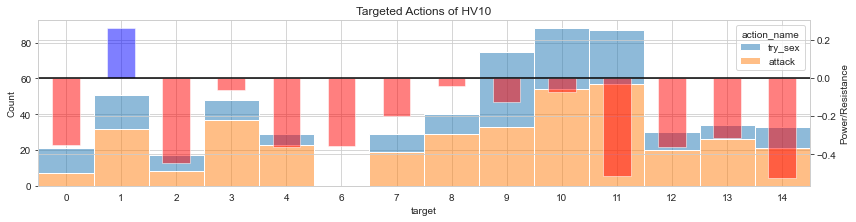

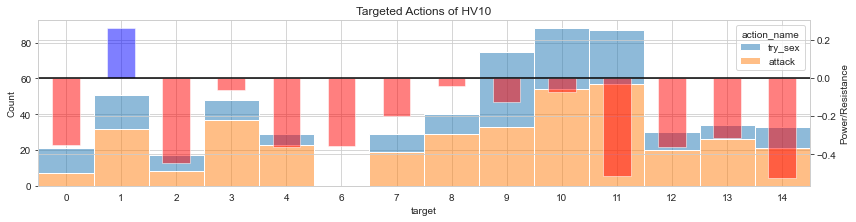

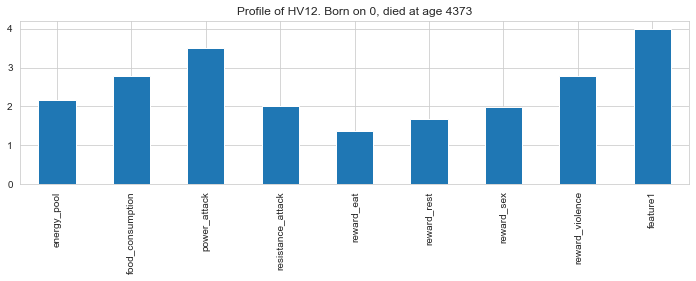

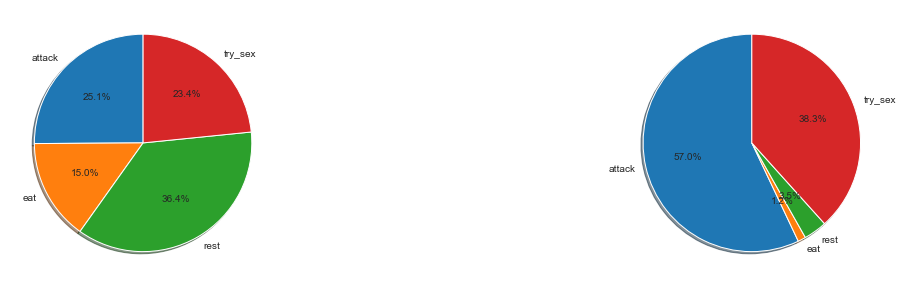

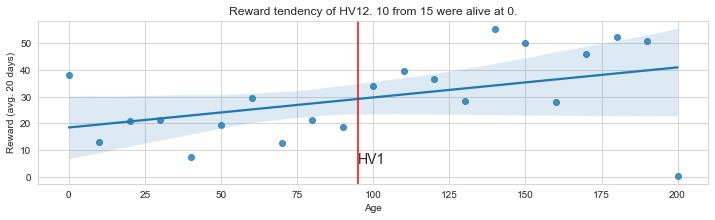

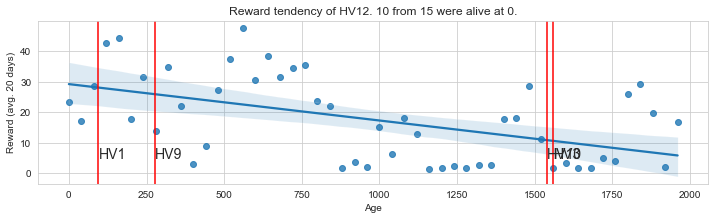

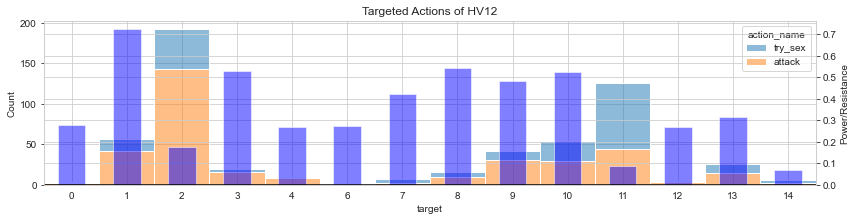

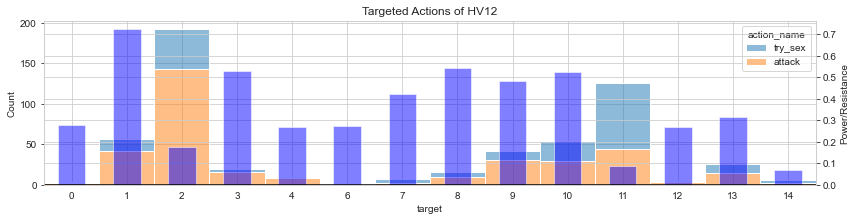

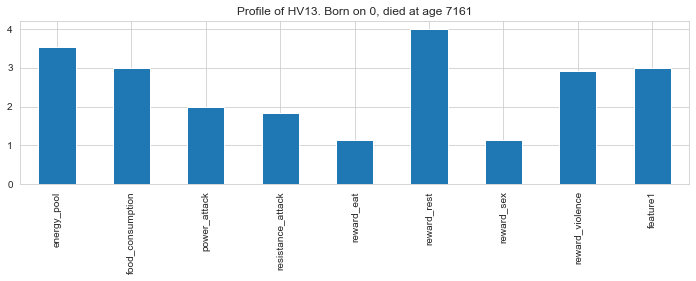

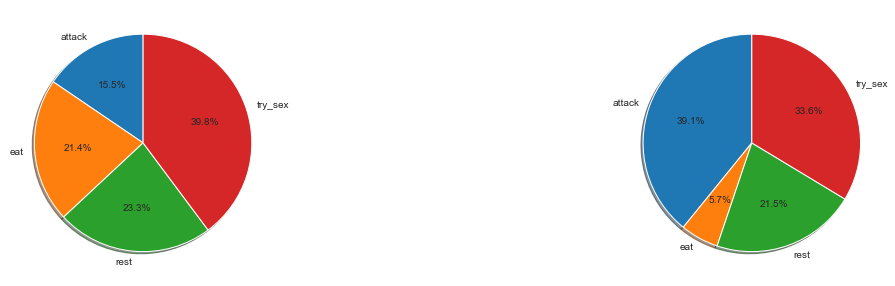

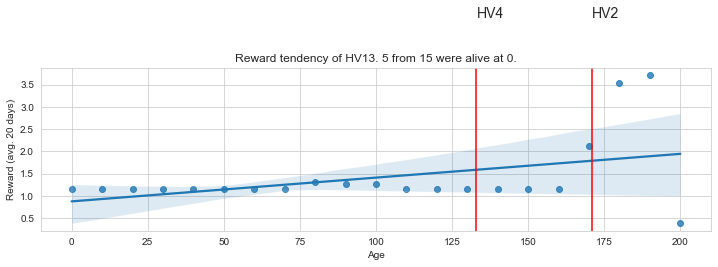

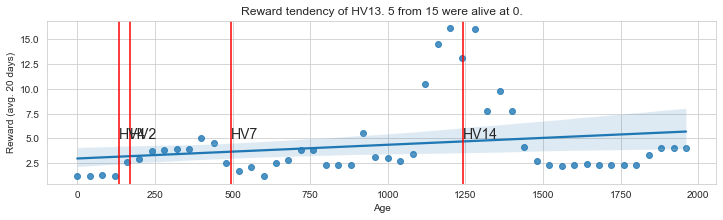

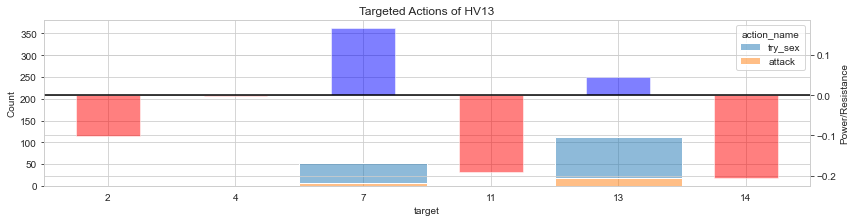

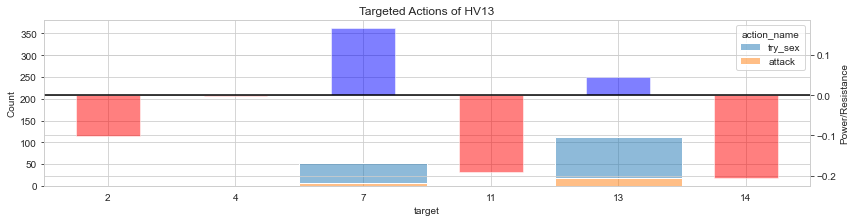

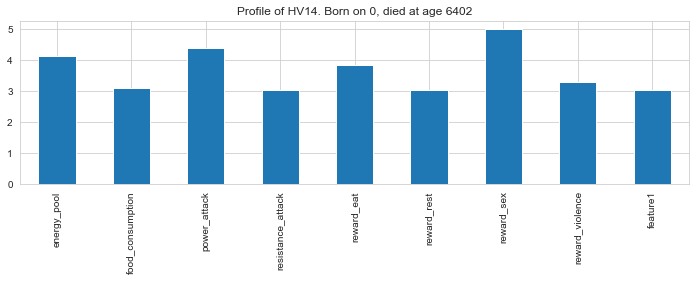

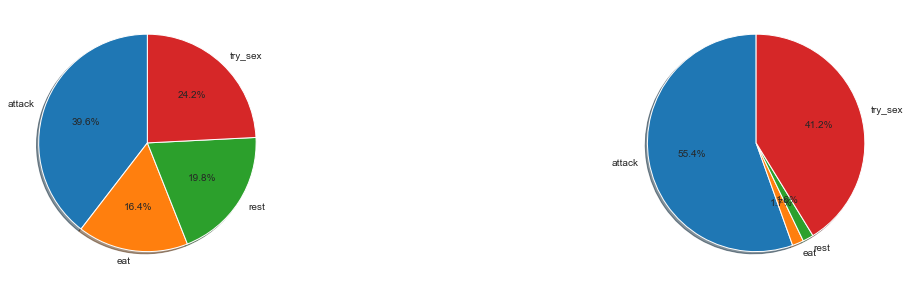

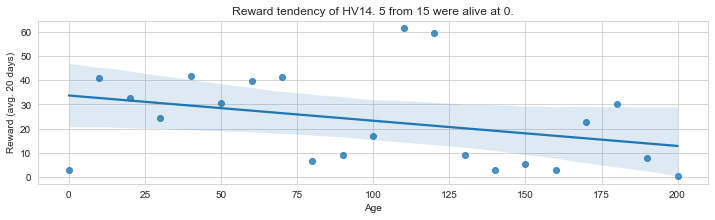

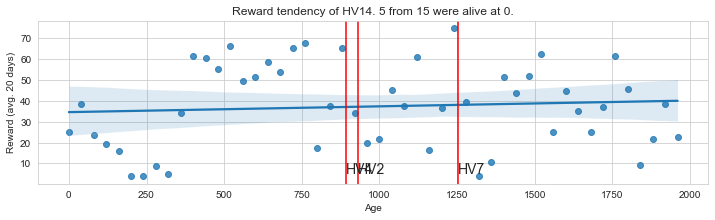

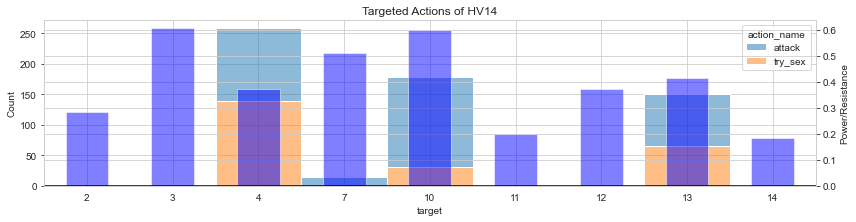

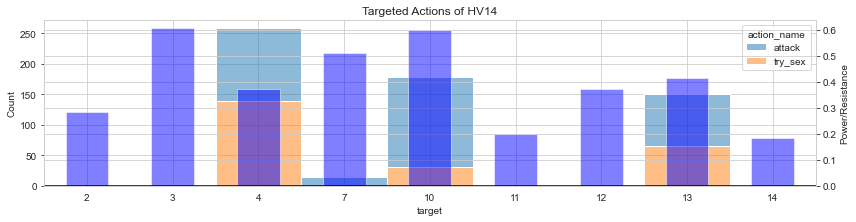

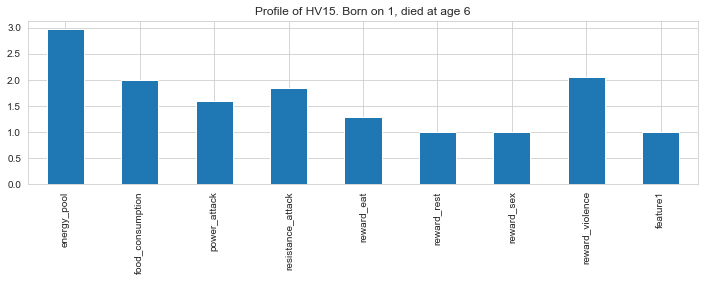

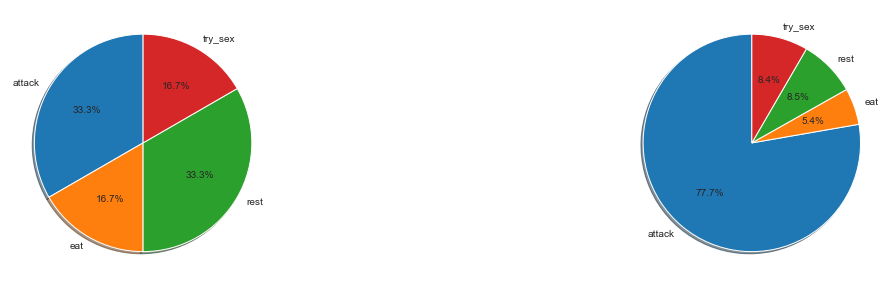

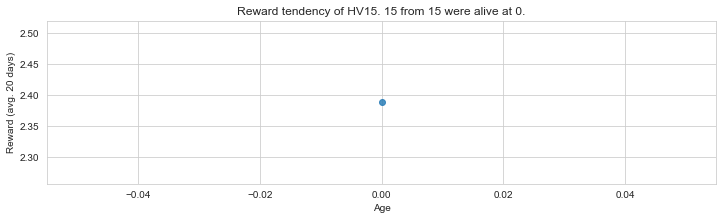

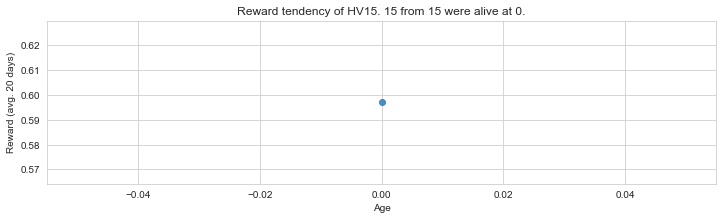

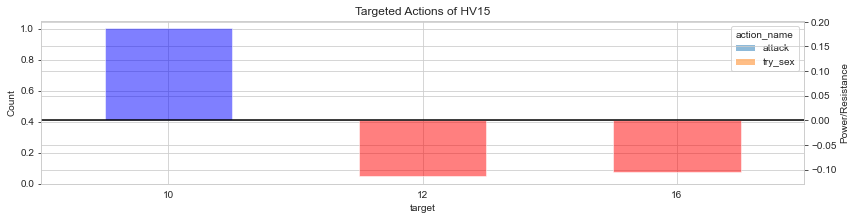

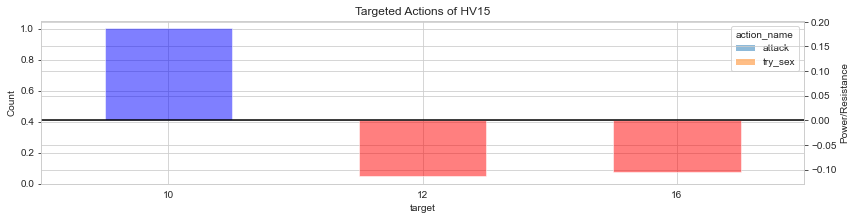

In [42]:
for i in ihvs[0:15]:
    plots(i)